In [1]:
import sys
sys.path.append('../')
 
from FO1st import *

In [2]:
def testParser(input_text, showOption='polish', verbose=False):
  # showOption ::= 'polish' | 'RPN' | 'infix_latex' | 'bussproof' | 'tree'
  # 'bussproof' output is LaTeX source text.
  # verbose has effect only when showOption == 'polish', 'RPN' or 'tree'
  from IPython.display import display, Math

  try:
    ast = parse_text(input_text)
  except ValueError as e:
    print(f"ValueError: {e}")
  except SyntaxError as e:
    print(f"SyntaxError: {e}")
  else:
    if showOption=='polish':
      print(ast.build_polish_notation(verbose))
    elif showOption=='RPN':
      print(ast.build_RPN(verbose))
    elif showOption=='infix_latex':
      s = ast.build_infix_latex()
      print("\n$", s, "$") # latex source text
      display(Math(f"${s}$")) # render LaTeXed expression
    elif showOption=='bussproof':
      s = ast.build_bussproof() 
      print(s)
    elif showOption=='tree':
      ast.draw_tree(verbose)
    else:
      raise ValueError(f"Invalid showOption: {showOption}")

- f_23 - x - - c 12

$ -f_{2}(-x, -(-c), 12) $


<IPython.core.display.Math object>

\begin{prooftree}
\AxiomC{$-f_{2}(-x, -(-c), 12)$}
\end{prooftree}

root: -f_{2}(-x, -(-c), 12), position: (0.000, 0.000), width: 1.146, height: 0.090



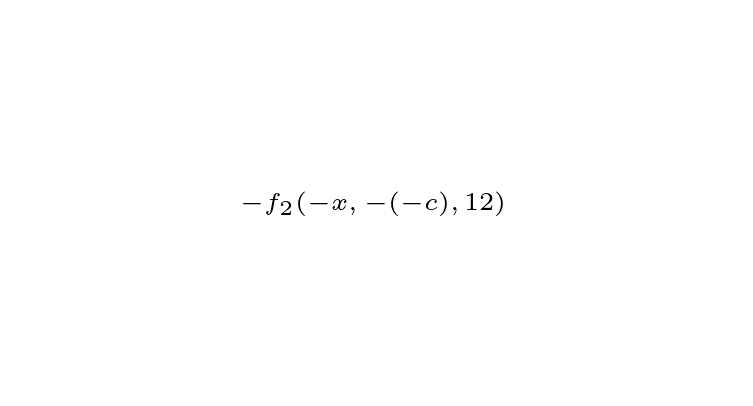

In [3]:
# term example 1

v_str1 = "-f_23(-x, --c, 12)"
testParser(v_str1) 
testParser(v_str1, 'infix_latex') 
testParser(v_str1, 'bussproof') # term has no tree structure
testParser(v_str1, 'tree', verbose=True) # term has no tree structure


+ - x - + y x

$ -x + (-(y + x)) $


<IPython.core.display.Math object>

\begin{prooftree}
\AxiomC{$-x + (-(y + x))$}
\end{prooftree}

root: -x + (-(y + x)), position: (0.000, 0.000), width: 0.956, height: 0.090



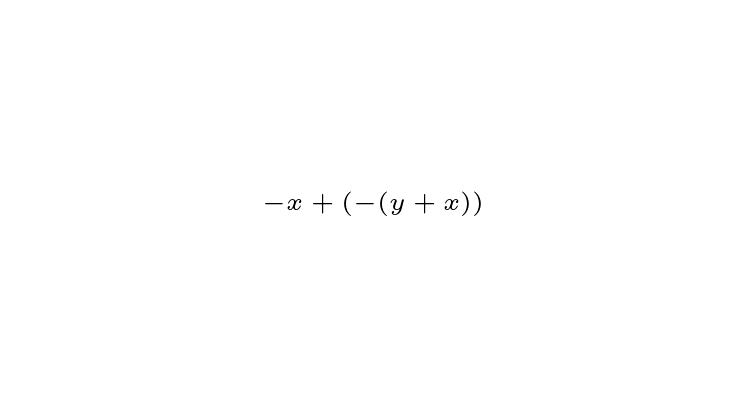

In [4]:
# term example 2

v_str1 = "-x + (-(y+x))" 

testParser(v_str1) 
testParser(v_str1, 'infix_latex') 
testParser(v_str1, 'bussproof') # term has no tree structure
testParser(v_str1, 'tree', verbose=True) # term has no tree structure


In [5]:
# term example 3

v_str1 = "x / (y div z)" 

testParser(v_str1) 
testParser(v_str1, 'infix_latex') 

/ x div y z

$ x / (y \div z) $


<IPython.core.display.Math object>

In [6]:
# term example 4

v_str1 = "(a+c)^b" 
testParser(v_str1) 
testParser(v_str1, 'infix_latex') 

^ + a c b

$ (a + c)^{b} $


<IPython.core.display.Math object>

In [7]:
# term example 5

v_str1 = "a^inv^#^2" 
testParser(v_str1) 
testParser(v_str1, 'infix_latex') 

^ ^# ^inv a 2

$ ((a^{-1})^\#)^{2} $


<IPython.core.display.Math object>

A3 x a + + y 1 z

$ A(x, a, y + 1 + z) $


<IPython.core.display.Math object>

\begin{prooftree}
\AxiomC{$x$}
\AxiomC{$a$}
\AxiomC{$y + 1 + z$}
\TrinaryInfC{$A$}
\end{prooftree}

root: A, position: (0.000, 0.000), width: 1.066, height: 0.270
root: x, position: (-0.496, 0.180), width: 0.075, height: 0.090
root: a, position: (-0.224, 0.180), width: 0.072, height: 0.090
root: y + 1 + z, position: (0.272, 0.180), width: 0.523, height: 0.090



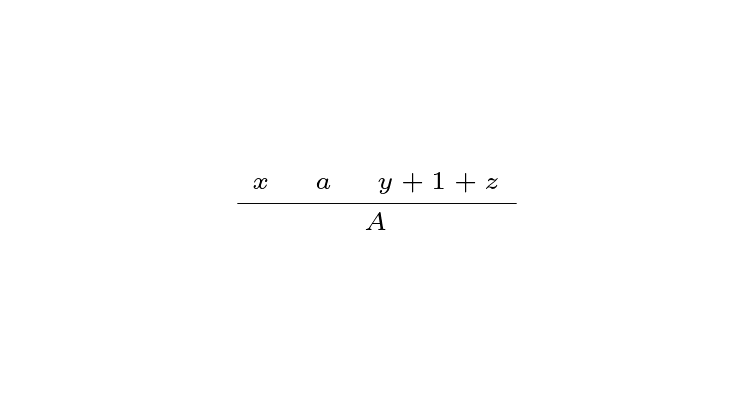

In [8]:
# formula example 1

v_str = 'A3(x,a,y+1+z)'
testParser(v_str)
testParser(v_str, 'infix_latex')
testParser(v_str, 'bussproof')
testParser(v_str, 'tree', verbose=True)

ALongLongPred2 f2 x a y

$ {\rm ALongLongPred}(f(x, a), y) $


<IPython.core.display.Math object>

\begin{prooftree}
\AxiomC{$f(x, a)$}
\AxiomC{$y$}
\BinaryInfC{${\rm ALongLongPred}$}
\end{prooftree}

root: {\rm ALongLongPred}, position: (0.000, 0.000), width: 0.934, height: 0.270
root: f(x, a), position: (-0.133, 0.180), width: 0.390, height: 0.090
root: y, position: (0.294, 0.180), width: 0.068, height: 0.090



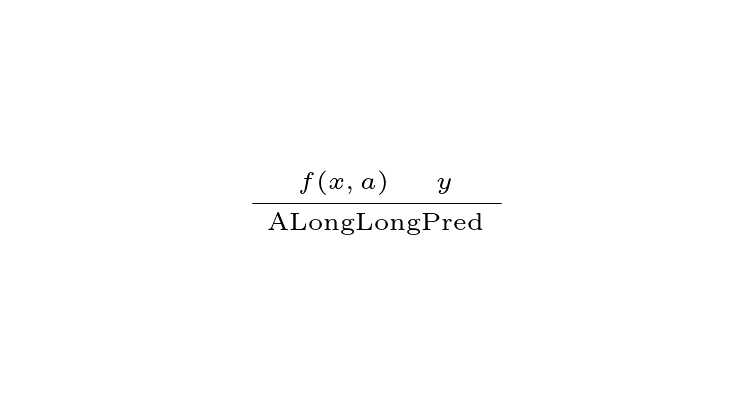

In [9]:
# formula example 2

v_str = 'ALongLongPred2(f2(x,a),  y)'
testParser(v_str)
testParser(v_str, 'infix_latex')
testParser(v_str, 'bussproof')
testParser(v_str, 'tree', verbose=True)

imp BinaryPred2 x y = fLong x y

$ {\rm BinaryPred}(x, y)\: \rightarrow\: {\rm fLong}(x) = y $


<IPython.core.display.Math object>

\begin{prooftree}
\AxiomC{$x$}
\AxiomC{$y$}
\BinaryInfC{${\rm BinaryPred}$}
\AxiomC{${\rm fLong}(x)$}
\AxiomC{$y$}
\BinaryInfC{$=$}
\BinaryInfC{$\rightarrow$}
\end{prooftree}

root: \rightarrow, position: (0.000, 0.000), width: 1.626, height: 0.450
root: {\rm BinaryPred}, position: (-0.317, 0.180), width: 0.657, height: 0.270
root: x, position: (-0.133, 0.180), width: 0.075, height: 0.090
root: y, position: (0.136, 0.180), width: 0.068, height: 0.090
root: =, position: (0.595, 0.180), width: 0.771, height: 0.270
root: {\rm fLong}(x), position: (-0.133, 0.180), width: 0.505, height: 0.090
root: y, position: (0.351, 0.180), width: 0.068, height: 0.090



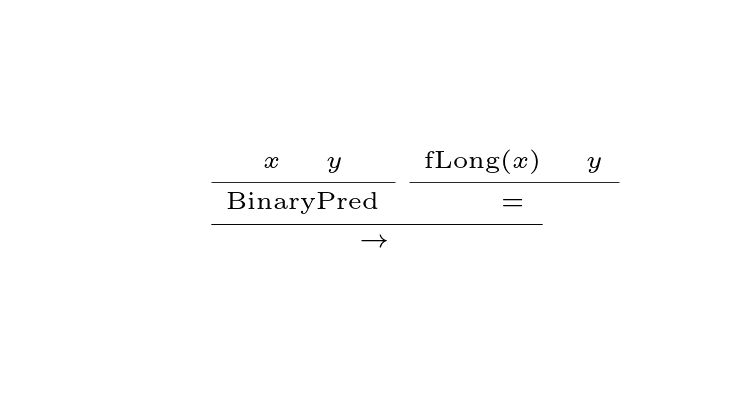

In [10]:
# formula example 3

v_str = 'BinaryPred2(x, y) imp fLong(x) = y'
testParser(v_str)
testParser(v_str, 'infix_latex')
testParser(v_str, 'bussproof')
testParser(v_str, 'tree', verbose=True)

imp not A and = y y not > ^ x 2 f2 + x 1 y

$ \neg\, A\: \rightarrow\: y = y\: \wedge\: \neg\, (x^{2} > f(x + 1, y)) $


<IPython.core.display.Math object>

\begin{prooftree}
\AxiomC{$A$}
\UnaryInfC{$\neg$}
\AxiomC{$y$}
\AxiomC{$y$}
\BinaryInfC{$=$}
\AxiomC{$x^{2}$}
\AxiomC{$f(x + 1, y)$}
\BinaryInfC{$>$}
\UnaryInfC{$\neg$}
\BinaryInfC{$\wedge$}
\BinaryInfC{$\rightarrow$}
\end{prooftree}

root: \rightarrow, position: (0.000, 0.000), width: 1.778, height: 0.810
root: \neg, position: (-0.494, 0.180), width: 0.099, height: 0.270
root: A, position: (0.000, 0.180), width: 0.099, height: 0.090
root: \wedge, position: (0.494, 0.180), width: 1.481, height: 0.630
root: =, position: (-0.417, 0.180), width: 0.334, height: 0.270
root: y, position: (-0.133, 0.180), width: 0.068, height: 0.090
root: y, position: (0.133, 0.180), width: 0.068, height: 0.090
root: \neg, position: (0.423, 0.180), width: 0.950, height: 0.450
root: >, position: (0.000, 0.180), width: 0.950, height: 0.270
root: x^{2}, position: (-0.407, 0.180), width: 0.136, height: 0.090
root: f(x + 1, y), position: (0.167, 0.180), width: 0.616, height: 0.090



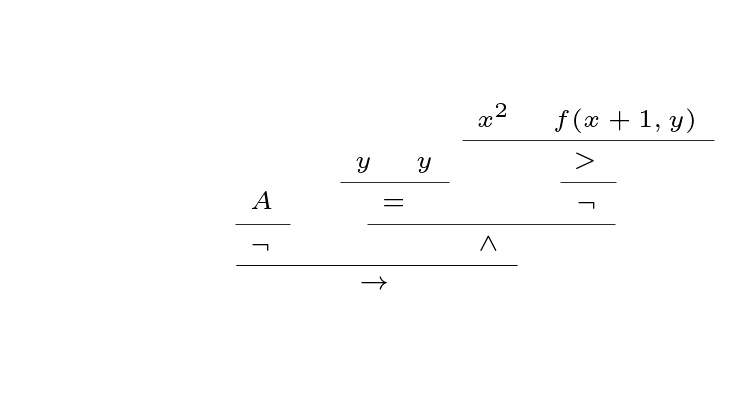

In [11]:
# formula example 4

v_str = "not A imp y = y and not x^2 > f2(x + 1, y)"
testParser(v_str)
testParser(v_str, 'infix_latex')
testParser(v_str, 'bussproof')
testParser(v_str, 'tree', verbose=True)


and < x ^ y 2 <= ^ y 2 + u f 1

$ x < y^{2} \le u + f(1) $


<IPython.core.display.Math object>

\begin{prooftree}
\AxiomC{$x$}
\AxiomC{$y^{2}$}
\BinaryInfC{$<$}
\AxiomC{$y^{2}$}
\AxiomC{$u + f(1)$}
\BinaryInfC{$\le$}
\BinaryInfC{$\wedge$}
\end{prooftree}

root: \wedge, position: (0.000, 0.000), width: 1.419, height: 0.450
root: <, position: (-0.404, 0.180), width: 0.405, height: 0.270
root: x, position: (-0.165, 0.180), width: 0.075, height: 0.090
root: y^{2}, position: (0.136, 0.180), width: 0.132, height: 0.090
root: \le, position: (0.404, 0.180), width: 0.816, height: 0.270
root: y^{2}, position: (-0.342, 0.180), width: 0.132, height: 0.090
root: u + f(1), position: (0.165, 0.180), width: 0.485, height: 0.090



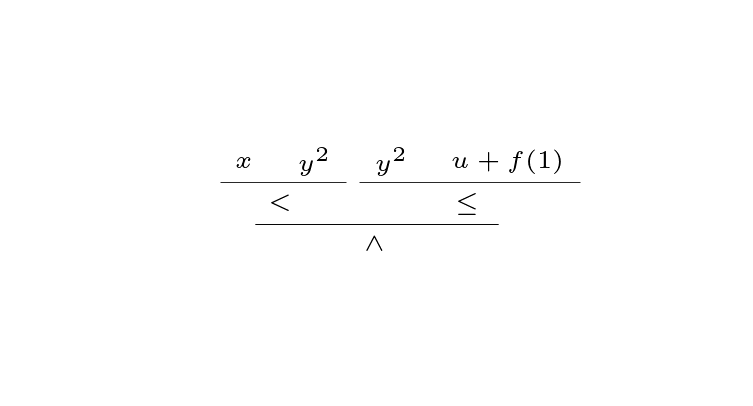

In [12]:
# formula example 5

v_str = "x < y^2 <= u+f(1)"
testParser(v_str)
testParser(v_str, 'infix_latex')
testParser(v_str, 'bussproof')
testParser(v_str, 'tree', verbose=True)

and and < ^ x 2 + ^ y - / 1 2 1 = + ^ y - / 1 2 1 - z sim - z f u

$ x^{2} < y^{-1 / 2} + 1 = -z \sim f(u) $


<IPython.core.display.Math object>

\begin{prooftree}
\AxiomC{$x^{2}$}
\AxiomC{$y^{-1 / 2} + 1$}
\BinaryInfC{$<$}
\AxiomC{$y^{-1 / 2} + 1$}
\AxiomC{$-z$}
\BinaryInfC{$=$}
\BinaryInfC{$\wedge$}
\AxiomC{$-z$}
\AxiomC{$f(u)$}
\BinaryInfC{$\sim$}
\BinaryInfC{$\wedge$}
\end{prooftree}

root: \wedge, position: (0.000, 0.000), width: 2.900, height: 0.630
root: \wedge, position: (-0.778, 0.180), width: 2.079, height: 0.450
root: <, position: (-0.568, 0.180), width: 0.925, height: 0.270
root: x^{2}, position: (-0.395, 0.180), width: 0.136, height: 0.090
root: y^{-1 / 2} + 1, position: (0.167, 0.180), width: 0.591, height: 0.090
root: =, position: (0.570, 0.180), width: 0.956, height: 0.270
root: y^{-1 / 2} + 1, position: (-0.183, 0.180), width: 0.591, height: 0.090
root: -z, position: (0.395, 0.180), width: 0.167, height: 0.090
root: \sim, position: (0.771, 0.180), width: 0.624, height: 0.270
root: -z, position: (-0.228, 0.180), width: 0.167, height: 0.090
root: f(u), position: (0.183, 0.180), width: 0.259, height: 0.090



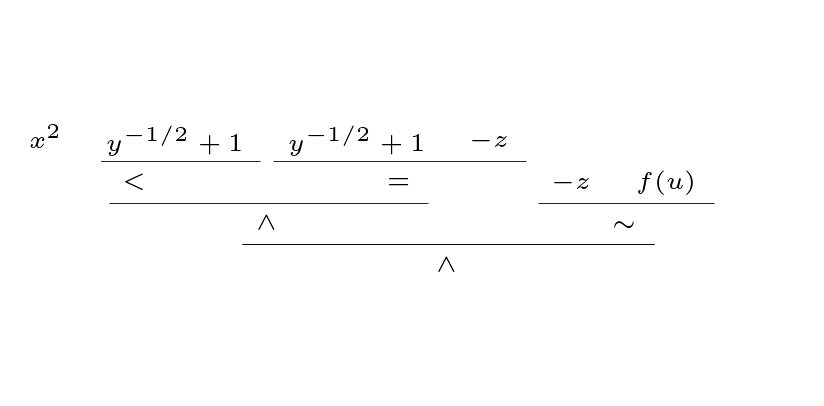

In [13]:
# formula example 6
# The tree in this example is too wide to be displayed correctly.

v_str = "x^2 < y^(-1/2)+1 =  -z  sim f(u)"
testParser(v_str)
testParser(v_str, 'infix_latex')
testParser(v_str, 'bussproof')
testParser(v_str, 'tree', verbose=True)

forall x not A1 x

$ \forall x\, \neg\, A(x) $


<IPython.core.display.Math object>

\begin{prooftree}
\AxiomC{$x$}
\UnaryInfC{$A$}
\UnaryInfC{$\neg$}
\UnaryInfC{$\forall x$}
\end{prooftree}

root: \forall x, position: (0.000, 0.000), width: 0.150, height: 0.630
root: \neg, position: (0.000, 0.180), width: 0.099, height: 0.450
root: A, position: (0.000, 0.180), width: 0.099, height: 0.270
root: x, position: (0.000, 0.180), width: 0.075, height: 0.090



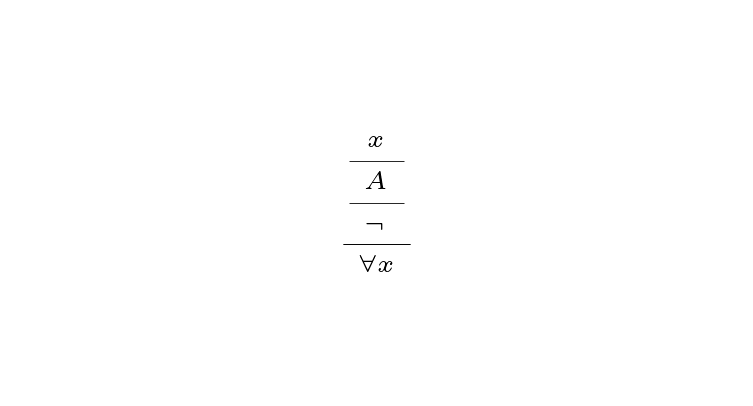

In [14]:
# formula example 7

v_str = "forall x not A1(x)"
testParser(v_str)
testParser(v_str, 'infix_latex')
testParser(v_str, 'bussproof')
testParser(v_str, 'tree', verbose=True)


iff forall y >= f x y exists x B1 x

$ \forall y\, (f(x) \ge y)\: \leftrightarrow\: \exists x\, B(x) $


<IPython.core.display.Math object>

\begin{prooftree}
\AxiomC{$f(x)$}
\AxiomC{$y$}
\BinaryInfC{$\ge$}
\UnaryInfC{$\forall y$}
\AxiomC{$x$}
\UnaryInfC{$B$}
\UnaryInfC{$\exists x$}
\BinaryInfC{$\leftrightarrow$}
\end{prooftree}

root: \leftrightarrow, position: (0.000, 0.000), width: 0.869, height: 0.630
root: \forall y, position: (-0.268, 0.180), width: 0.520, height: 0.450
root: \ge, position: (0.000, 0.180), width: 0.520, height: 0.270
root: f(x), position: (-0.133, 0.180), width: 0.255, height: 0.090
root: y, position: (0.226, 0.180), width: 0.068, height: 0.090
root: \exists x, position: (0.265, 0.180), width: 0.150, height: 0.450
root: B, position: (0.000, 0.180), width: 0.099, height: 0.270
root: x, position: (0.000, 0.180), width: 0.075, height: 0.090



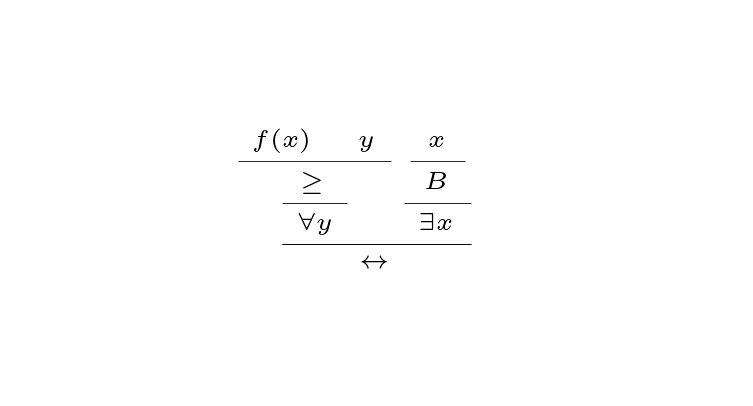

In [15]:
# formula example 8

v_str = "forall y  f(x) >= y iff exists x B1(x) "
testParser(v_str)
testParser(v_str, 'infix_latex')
testParser(v_str, 'bussproof')
testParser(v_str, 'tree', verbose=True)
